In [1]:
!pip install catboost
!pip install category_encoders
!pip install dtreeviz
!pip install --upgrade dtreeviz

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

# Feature Selection

## Demographic Features

In [3]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for feature in demographic_features:
    sns.countplot(x=feature, hue='Churn',data=df)
    plt.show()

## Account-Related Features

In [5]:
account_features = ['tenure','MonthlyCharges','TotalCharges','Contract', 'PaperlessBilling', 'PaymentMethod']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


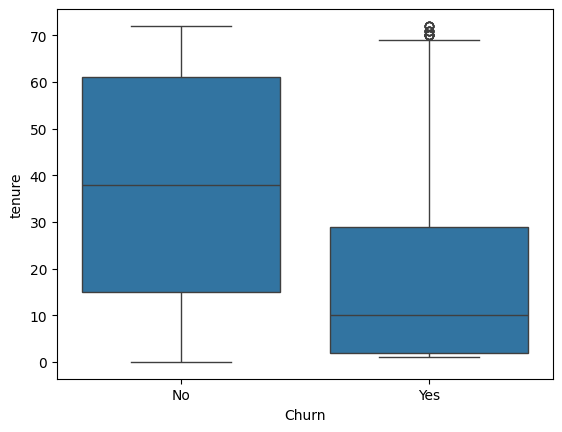

In [6]:
sns.boxplot(x='Churn', y='tenure', data=df);
#Customers with short tenure are more likely to churn, Customers with very long tenures are unexpectedly churning

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

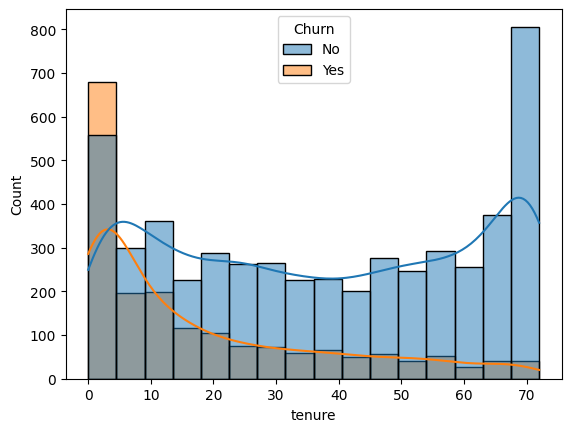

In [7]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True);
#Further exploring churning trend by tenure

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


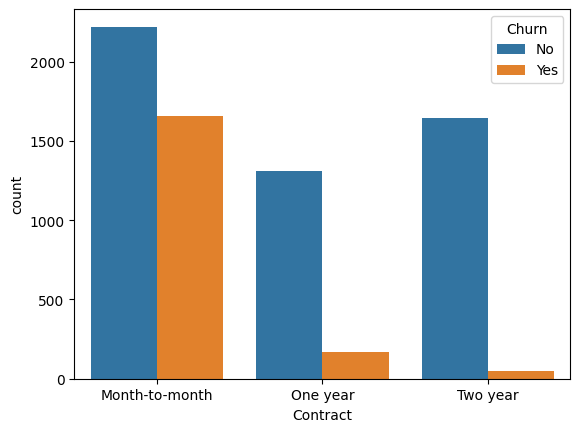

In [8]:
sns.countplot(x='Contract', hue='Churn', data=df);
#Contract longevity displays intention behind the decision of acquiring selected service

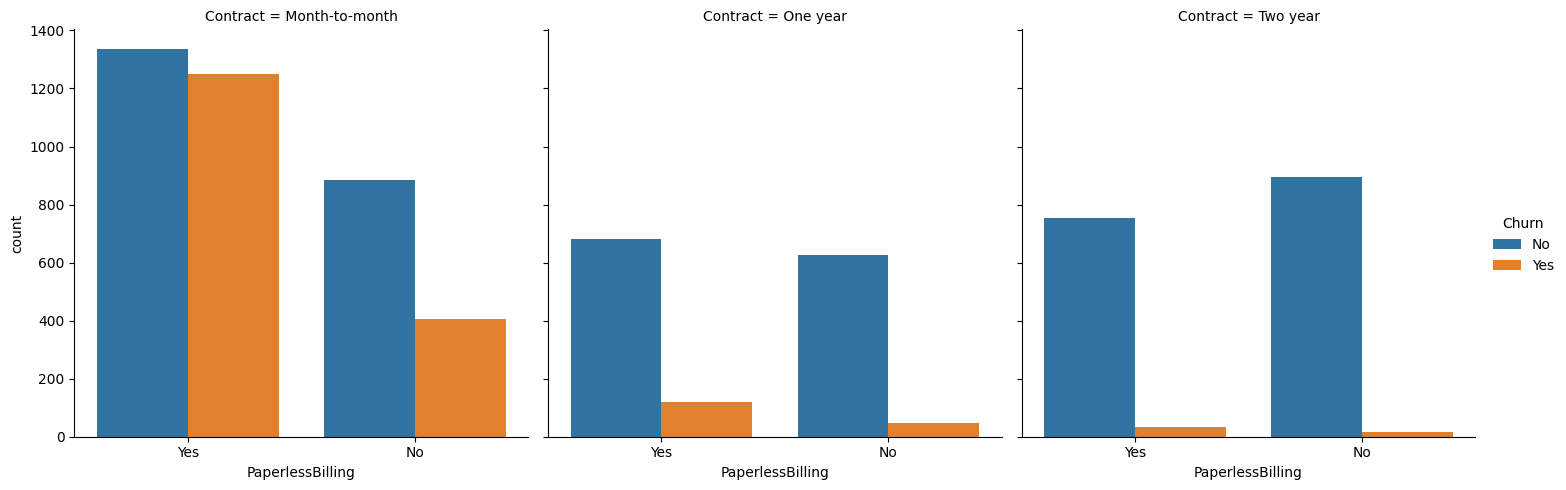

In [9]:
sns.catplot(x='PaperlessBilling', hue='Churn', col='Contract', data=df, kind='count');
#Almost same curve

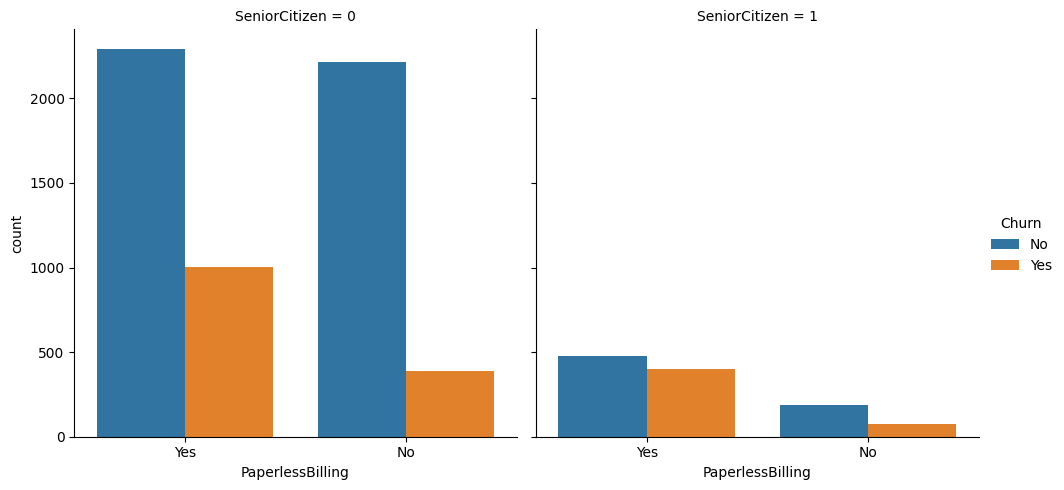

In [10]:
sns.catplot(x='PaperlessBilling', hue='Churn', col='SeniorCitizen', data=df, kind='count');
#While senior citizens tend to churn when using PaperlessBilling, non senior citizens also churn more with paperless billing. Explore further

### Charging-Related Features

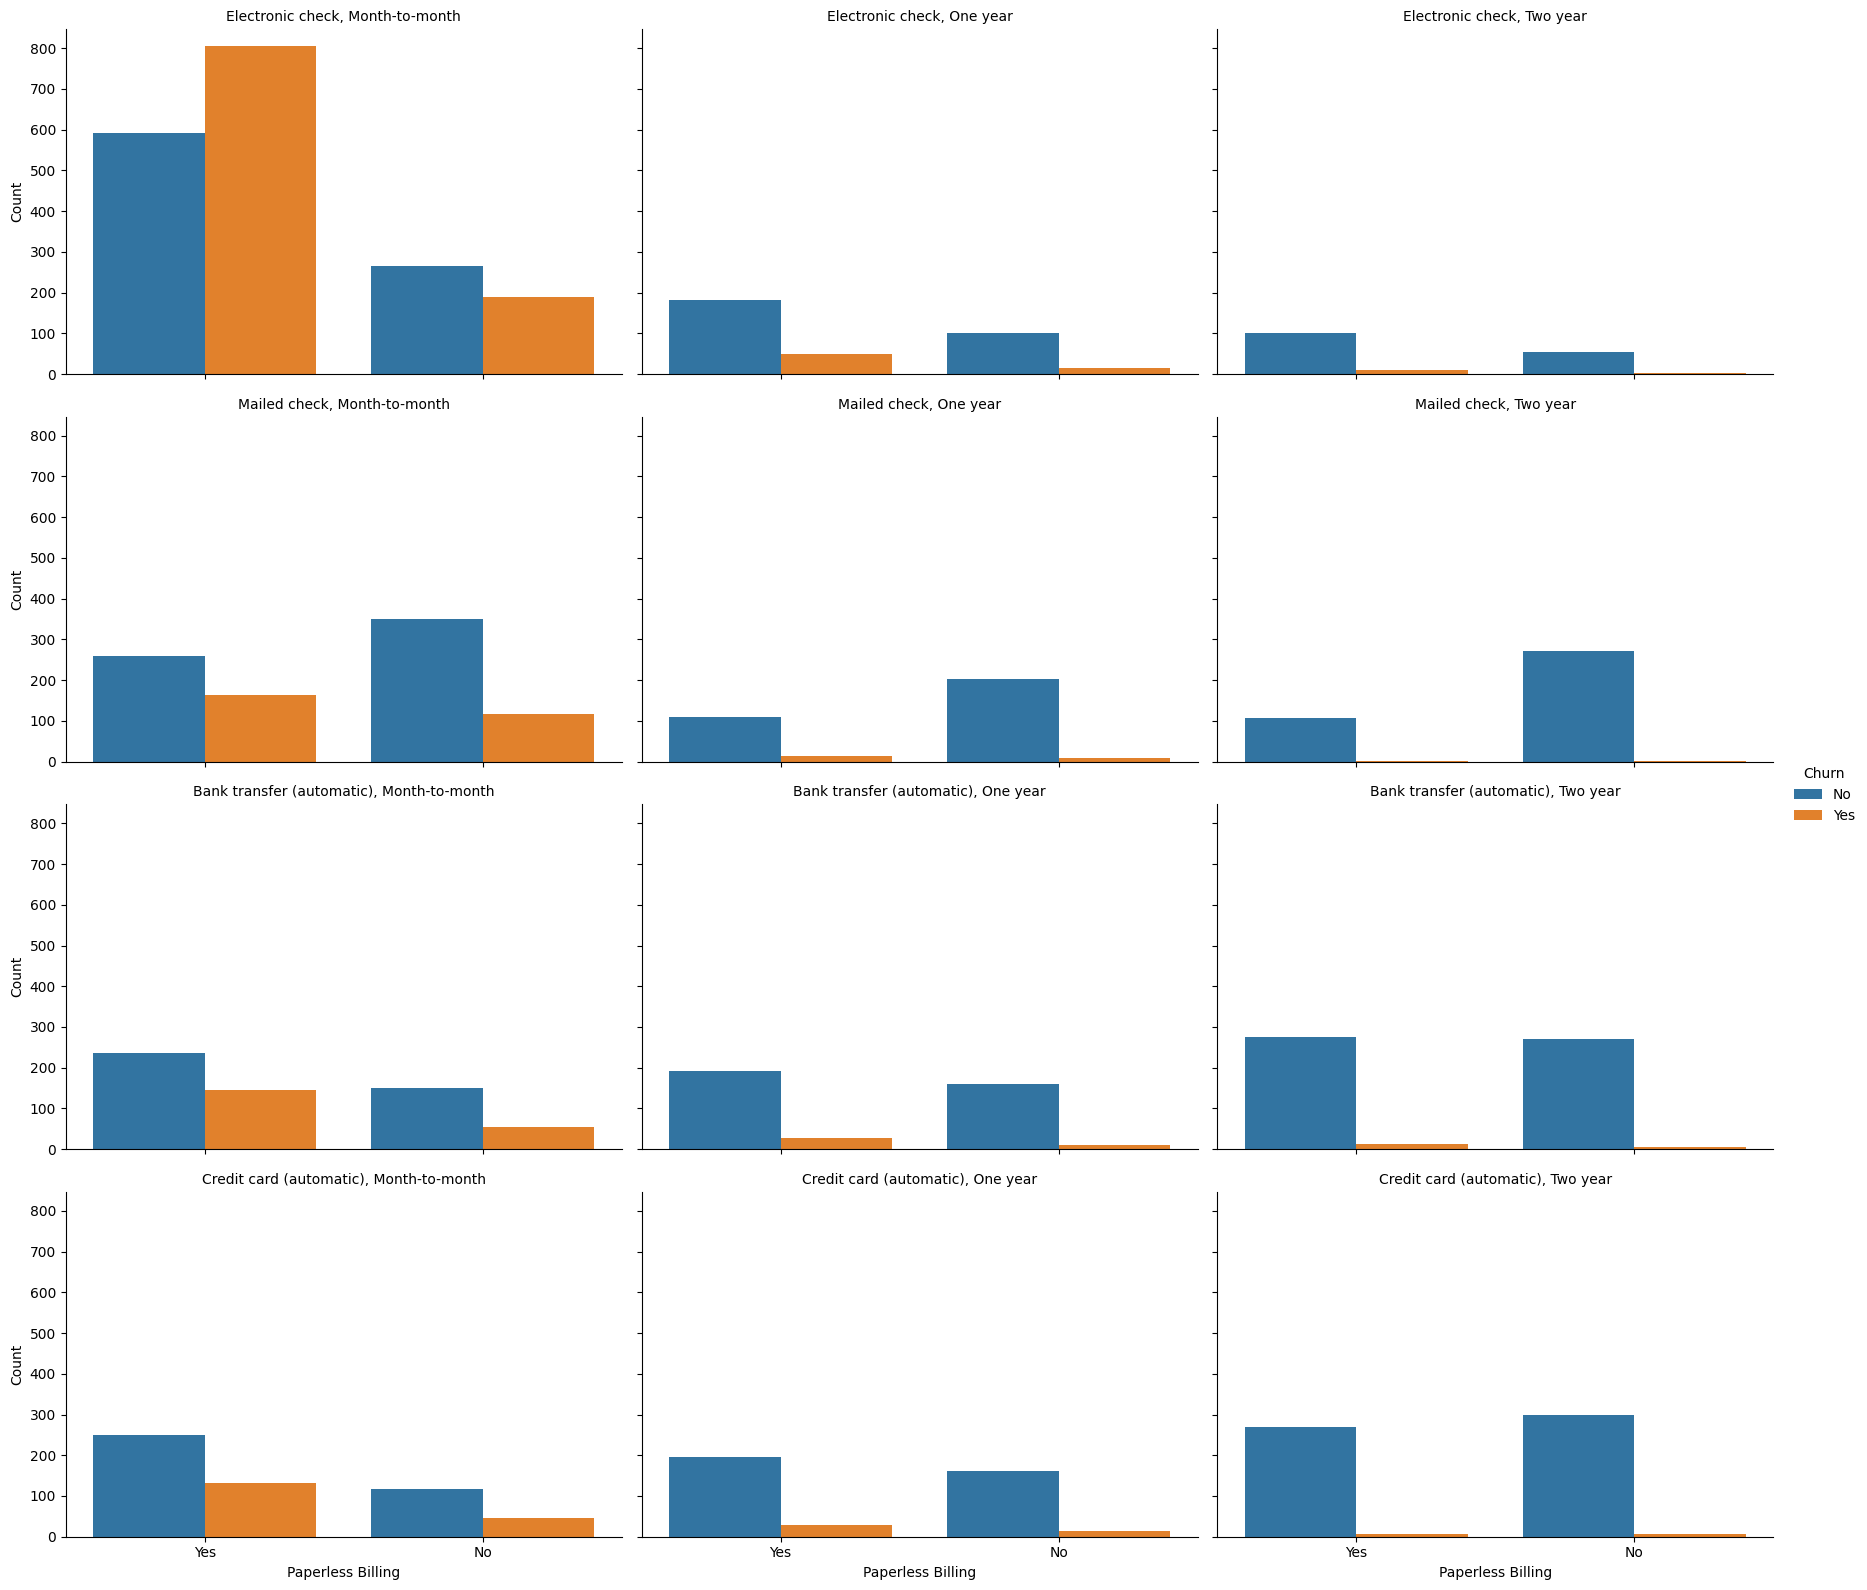

In [11]:
# Create a grid of plots to show the interaction between 'PaperlessBilling', 'Churn', and 'Contract' by 'PaymentMethod'
g = sns.catplot(x='PaperlessBilling', hue='Churn', col='Contract', row='PaymentMethod', data=df, kind='count', height=4, aspect=1.5)

# Adjust the layout for better visualization
g.set_titles("{row_name}, {col_name}")
g.set_axis_labels("Paperless Billing", "Count")
plt.show()
#Need to review electronic check payment method

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

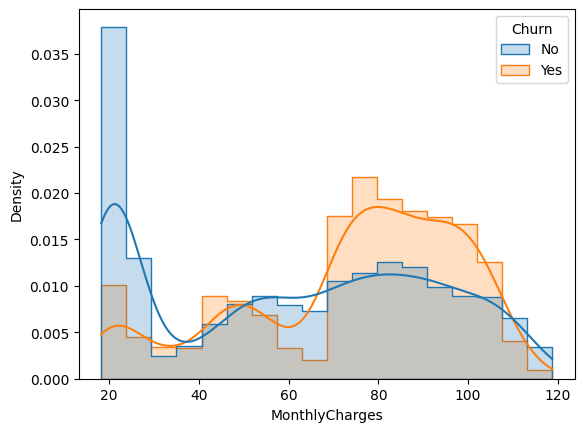

In [12]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element='step', stat='density', common_norm=False);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


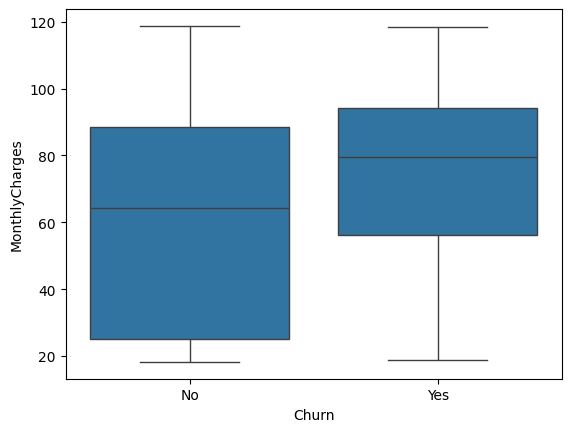

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df);

## Service-Related Features

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

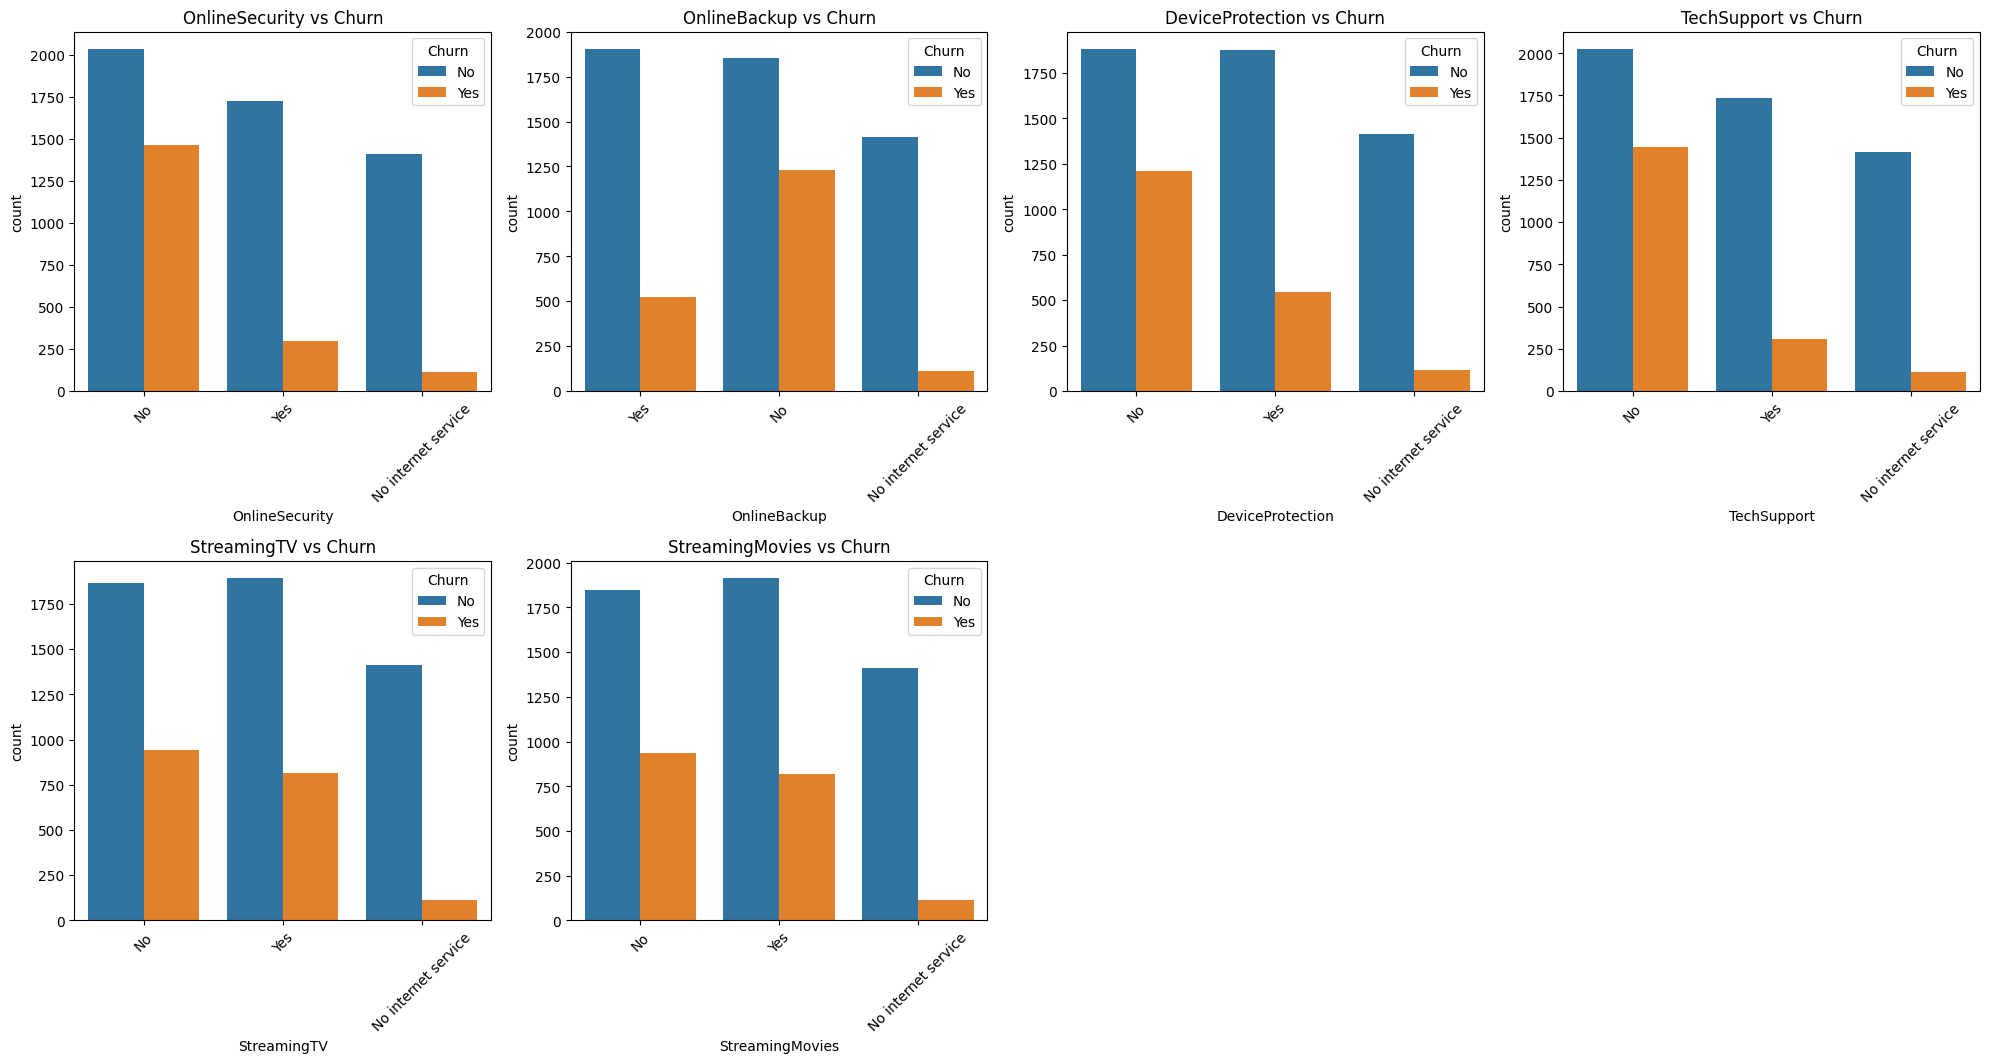

In [14]:
# List of categorical features to analyze
service_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies']

# Plotting count plots for categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(service_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

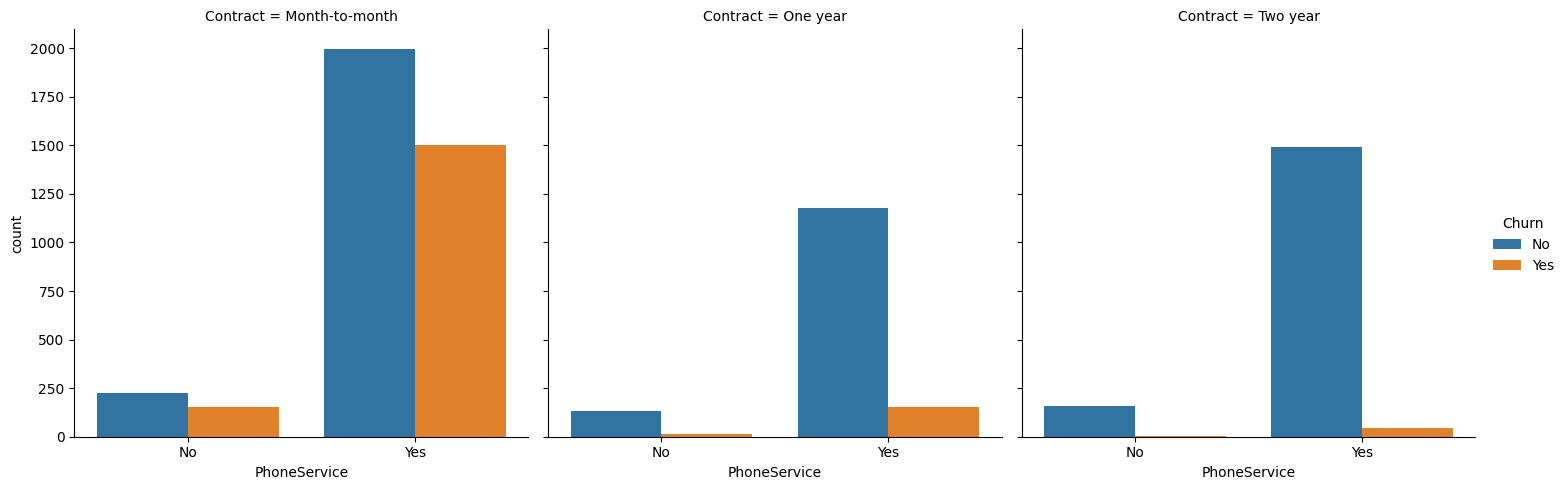

<Figure size 1500x500 with 0 Axes>

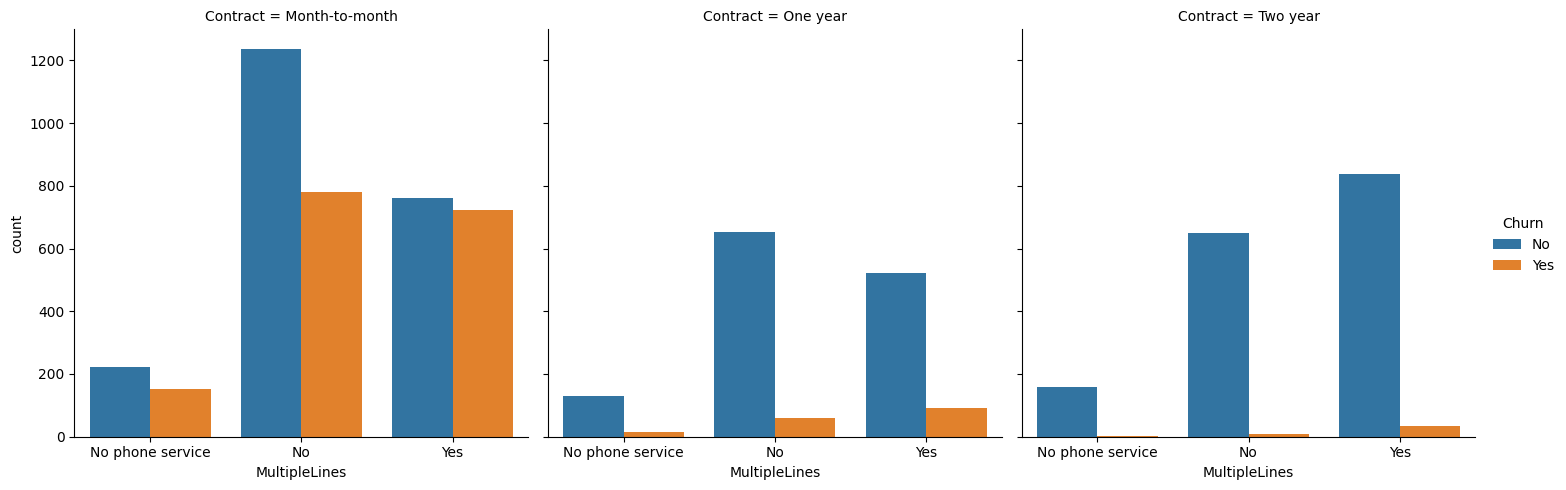

<Figure size 1500x500 with 0 Axes>

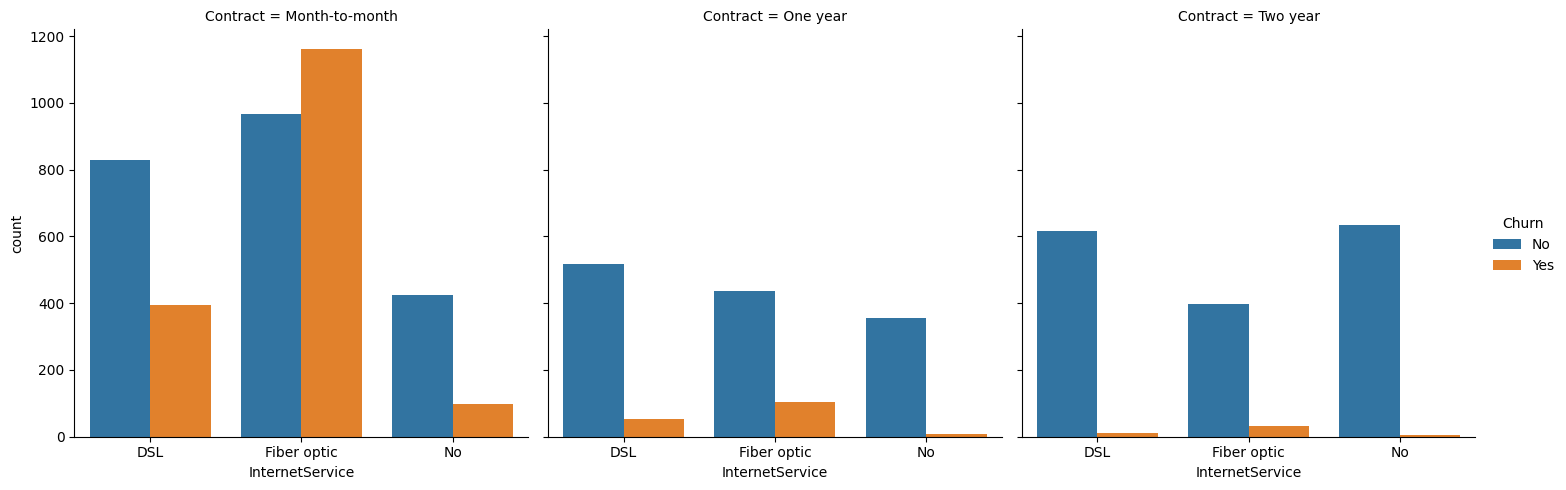

In [15]:
by_contract = ['PhoneService', 'MultipleLines', 'InternetService']
#sns.catplot(x='InternetService', hue='Churn', col='Contract', data=df, kind='count')

for feature in by_contract:
    plt.figure(figsize=(15, 5))
    sns.catplot(x=feature, hue='Churn', col='Contract', data=df, kind='count')
    plt.show();

## Insights da análise de features

### Análise Demográfica e de Serviço:

Senior Citizen: Idosos têm uma taxa de churn significativamente maior do que os mais jovens. Isso pode indicar que serviços ou políticas atuais podem não estar atendendo bem às necessidades ou expectativas desse grupo.
Partners e Dependents: Clientes sem parceiros ou dependentes tendem a ter taxas de churn mais altas. Isso sugere que clientes com laços familiares podem ter razões mais fortes para permanecer com o serviço devido a planos familiares ou descontos.

### Tempo de Contrato e Pagamentos:

Contract Type: Clientes com contratos de mês a mês têm uma taxa de churn muito mais alta em comparação com contratos de um ou dois anos. Isso destaca a importância de incentivar os clientes a se comprometerem com contratos mais longos para reduzir o churn.
Payment Method: O método de pagamento por cheque eletrônico mostra as maiores taxas de churn, especialmente para contratos de mês a mês, sugerindo que talvez esses clientes prefiram mais flexibilidade ou estejam menos satisfeitos com o serviço.

### Cobranças e Serviços Adicionais:

Monthly Charges: Existe uma distinção clara nas distribuições de cobranças mensais entre os que permanecem e os que saem, com churners tendendo a ter cobranças mensais mais altas. Isso pode indicar uma percepção de valor inferior ou insatisfação com o custo versus benefício do serviço.
Services: Serviços como segurança online, backup online, e suporte técnico são menos utilizados por clientes que desistem, o que pode sugerir uma oportunidade de destacar o valor desses serviços para melhorar a retenção.

### Faturamento sem Papel:

Paperless Billing: Clientes que utilizam faturamento sem papel têm taxas mais altas de churn. Embora o faturamento sem papel seja conveniente, isso pode indicar problemas com a percepção de transparência ou confiança nas cobranças.

### Insights de Tenure e Usabilidade:

Tenure: Clientes com menor tenure têm taxas de churn significativamente mais altas. Isso sugere a importância de engajar novos clientes de forma eficaz nos primeiros meses de serviço.

## Medidas de intervenção sugeridas

### Aumentar o Engajamento: Desenvolver programas específicos para aumentar a satisfação e o engajamento de idosos e clientes sem parceiros ou dependentes.

### Revisar Estratégias de Preços: Considerar ajustes nos preços ou oferecer mais benefícios percebidos para clientes com altas cobranças mensais.

### Promover Contratos Longos: Incentivar contratos de longa duração através de benefícios tangíveis, reduzindo assim a taxa de churn mensal.

### Aprimorar Serviços Adicionais: Melhorar a comunicação do valor dos serviços adicionais para aumentar a sua adoção e perceção de valor.

### Refinar Métodos de Pagamento: Avaliar e talvez modificar as opções de pagamento para abordar as altas taxas de churn associadas a certos métodos.

# Preprocessing Data

In [16]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
df.isnull().sum().sum()

0

In [18]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
# Number of categorical columns that aren't binary
n = 0
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'O':
        if len(df[column].unique()) >=2:
            n+=1
            print(column)
            categorical_columns.append(column)
print(n)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn
18


In [21]:
#Padronização
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

binary_features = ['Churn', 'gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']
for feature in binary_features:
    df.loc[:,feature] = df[feature].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

In [22]:
categorical_columns = ['InternetService',
                       'Contract',
                       'PaymentMethod',
                       'OnlineSecurity',
                       'OnlineBackup',
                       'DeviceProtection',
                       'TechSupport',
                       'StreamingTV',
                       'StreamingMovies',
                       'MultipleLines']

In [23]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,True,False,False,False,False,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,True,False,True,False,False,False,False,True,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,False,True,False,True,False,True,False,True,False,True
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,False,True,False,False,False,True,False,True,False,True
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,False,False,False,False,False,False,False,False,True,False
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,False,False,False,False,False,False,False,False,False,True


In [25]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [26]:
y_train, y_test = y_train.astype(int), y_test.astype(int)

# sklearn.tree.DecisionTreeClassifier

Experimentar modelo de árvore

roc_auc_score=0.82

## By-Encoding

### One-hot

In [27]:
dt_model = DecisionTreeClassifier(random_state=42)
# Definir os parâmetros para o GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Configurar o modelo e o GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2, error_score='raise')

In [28]:
# Executar o GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor pontuação de AUC
best_params = grid_search.best_params_
best_auc_score = grid_search.best_score_

best_params, best_auc_score

Fitting 5 folds for each of 90 candidates, totalling 450 fits


({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 0.8292554084271788)

In [29]:
best_model = grid_search.best_estimator_

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:\n", roc_auc)

ROC AUC Score:
 0.8291540677760877


### Target

In [30]:
# Initialize TargetEncoder
target_encoder = TargetEncoder()

# Apply Target Encoding only to categorical features
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Re-initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV with the encoded data
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_encoded, y_train)

# Display the best parameters and AUC score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best AUC score:  0.8292554084271788


In [31]:
y_pred = grid_search.predict(X_test)

In [32]:
y_pred_proba = grid_search.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_proba))

0.8291540677760877


In [33]:
best_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=5,
                                    min_samples_leaf=4,
                                    min_samples_split=2)
best_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [34]:
y_pred = best_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred))

0.8291540677760877


## Tentativa monochaco

### Visualização

In [35]:
clf = best_model.fit(X_train, y_train)

In [36]:
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=clf.feature_names_in_,
                           target_name='Churn', class_names=["No", "Yes"])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


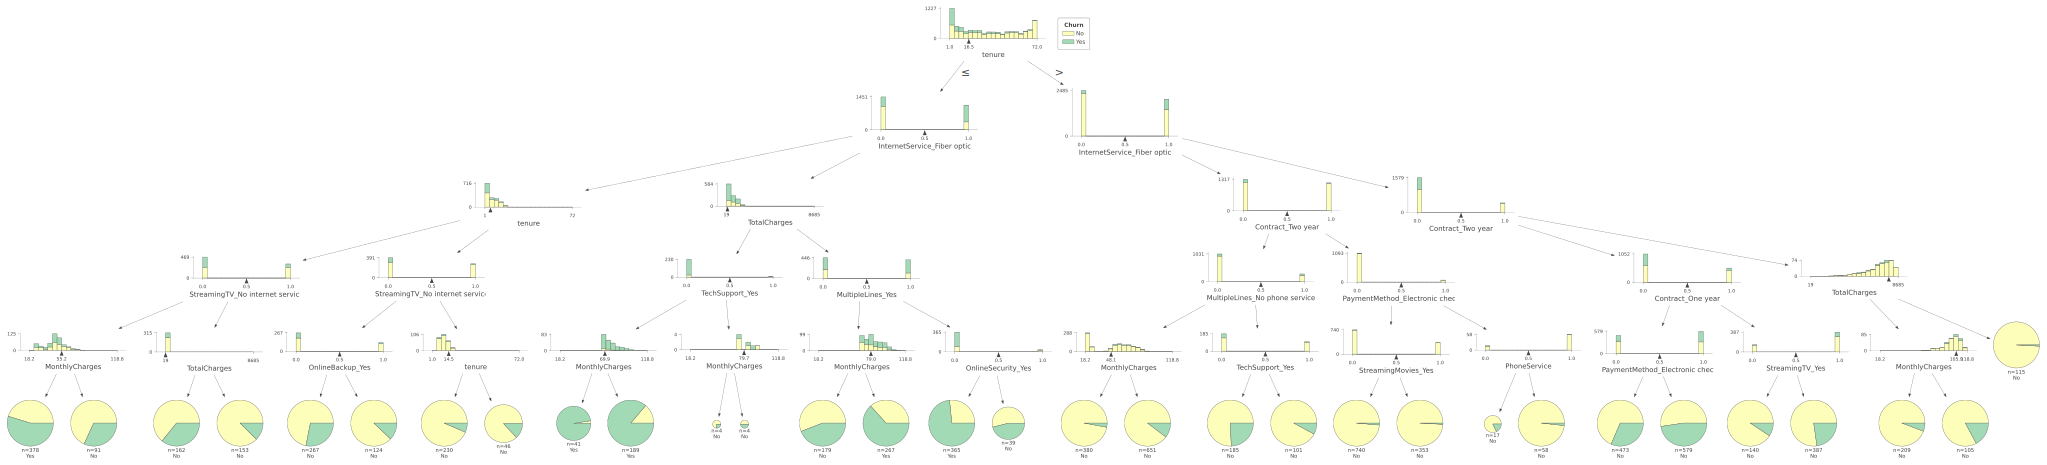

In [37]:
viz_model.view(fontname="DejaVu Sans", scale=1.5)

# sklearn.ensemble.RandomForestClassifier

Experimentar modelo ensemble

(roc_auc=0.84)




In [38]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Roc_auc:", best_auc_score)
best_rf_model = grid_search.best_estimator_
best_auc_score = grid_search.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Roc_auc: 0.8292554084271788


In [39]:
best_model = grid_search.best_estimator_

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:\n", roc_auc)

ROC AUC Score:
 0.8382592714841839


# sklearn.ensemble.ExtraTreesClassifier

Experimentar modelo de bagging

(roc_auc=0.84)

O fit do modelo demorou uma hora

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

In [41]:
et_classifier = ExtraTreesClassifier(random_state=42)

In [42]:
grid_search = GridSearchCV(estimator=et_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [44]:
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best AUC score:  0.8439872682053753


In [45]:
# Evaluate model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Roc_auc_score", roc_auc_score(y_test, y_pred))

Roc_auc_score 0.7025105449189497


# catboost.CatBoostClassifier

Experimentar modelo de boosting

(roc_auc=0.86)

mais se adequa, lida nativamente com variáveis categóricas, não demora tanto pra rodar

## Padronização - catboost

In [46]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [47]:
df.drop('customerID', axis=1, inplace=True)
X=df.drop('Churn', axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Non binary categorical features
n = 0
categorical_columns = []
for column in X.columns:
    if df[column].dtype == 'O':
        if len(df[column].unique()) >=2:
            n+=1
            print(column)
            categorical_columns.append(column)
print(n)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
16


In [49]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


## Modelo

In [50]:
param_grid= {
'iterations': [100,200,300],
'depth': [4,6,8],
'learning_rate': [0.1,0.01,0.001]
}

In [51]:
cat_gridsearch = GridSearchCV(estimator=CatBoostClassifier(verbose=0),
                              param_grid=param_grid,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1,
                              error_score='raise'
                              )

In [52]:
cat_gridsearch.fit(X_train, y_train, cat_features=categorical_columns)

GridSearchCV(cv=5, error_score='raise',
             estimator=<catboost.core.CatBoostClassifier object at 0x7e620d09fb20>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [53]:
y_pred = cat_gridsearch.predict(X_test)

In [54]:
print("Melhores parâmetros encontrados: ", cat_gridsearch.best_params_)
print("Melhor pontuação AUC: ", cat_gridsearch.best_score_)

Melhores parâmetros encontrados:  {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}
Melhor pontuação AUC:  0.8449592642730479


In [55]:
y_pred_proba = cat_gridsearch.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score: ", roc_auc)

ROC AUC Score:  0.8652685623195007


#### teste